## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069170,0.554695,6.285663,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.253994,0.115878,0.705900,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.884000,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.209000,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.629000,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:

# For plotting histogram to analyse data
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize=(20,15))

## Train - Test Splitting

In [9]:

# For Learning Purpose Only. This function is defined in sklearn.
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)


[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
# print("Rows in train set: ", len(train_set))
# print("Rows in test set: ", len(test_set))

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Rows in train set: ", len(train_set))
print("Rows in test set: ", len(test_set))

Rows in train set:  404
Rows in test set:  102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
# split.get_n_splits(housing, housing['CHAS'])
for (train_index, test_index) in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069170,0.554695,6.285663,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.253994,0.115878,0.705900,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.884000,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.209000,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.629000,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
housing = strat_train_set.copy()

In [18]:
housing.describe() # Before we started imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.607910,10.867304,11.306678,0.069307,0.558071,6.272885,68.840246,3.749289,9.737624,412.500000,18.465842,352.889876,12.929734,22.383416
std,8.043325,22.065187,6.693596,0.254290,0.116865,0.702511,27.626697,2.103235,8.728918,168.563917,2.144465,96.198946,7.064564,9.168383
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.090060,0.000000,5.860000,0.000000,0.453000,5.878500,45.750000,2.019025,4.000000,284.000000,17.400000,374.237500,7.212500,16.675000
50%,0.316800,0.000000,10.010000,0.000000,0.538000,6.211000,76.250000,3.147400,5.000000,337.000000,19.000000,390.975000,12.300000,21.150000
75%,3.611874,12.500000,18.100000,0.000000,0.631000,6.629500,93.650000,5.100400,24.000000,666.000000,20.200000,395.630000,16.910000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


 ## Looking for Corelations
 Finding proportionality

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.665588
B          0.365318
ZN         0.361919
DIS        0.258677
CHAS       0.198884
RAD       -0.376030
CRIM      -0.392596
AGE       -0.393630
NOX       -0.435271
TAX       -0.464338
PTRATIO   -0.484401
INDUS     -0.492273
LSTAT     -0.722134
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

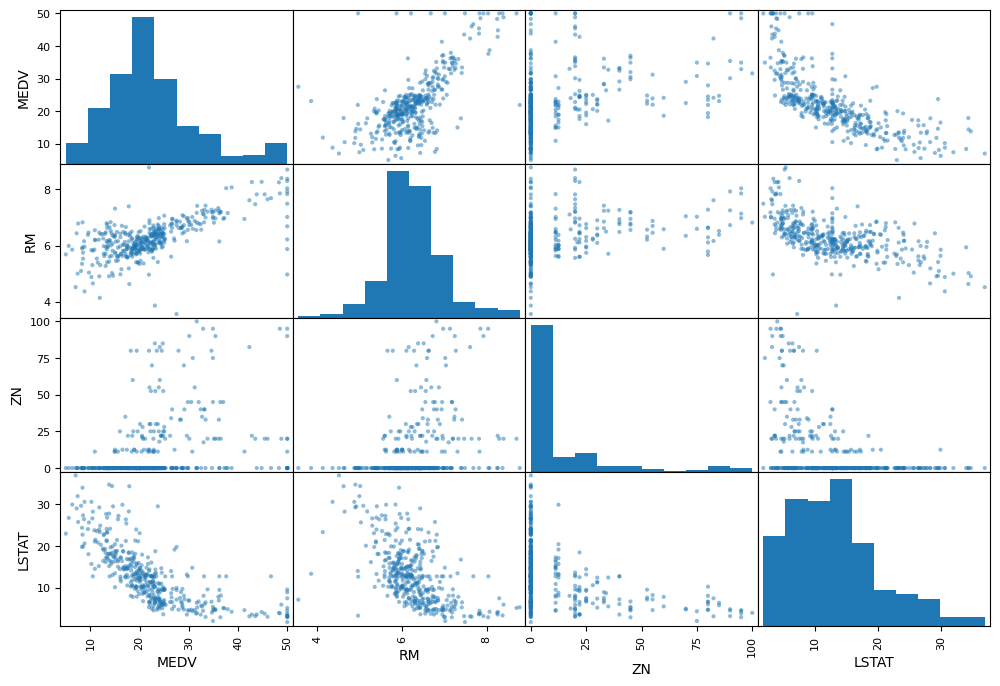

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

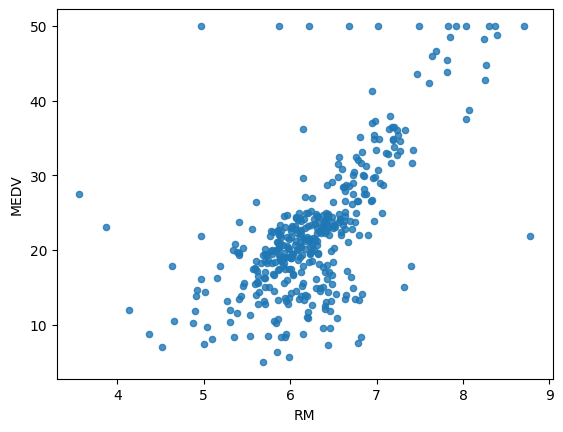

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Attribute Combination

In [23]:
# housing['TAXRM'] = housing['TAX']/housing['RM']

In [24]:
# housing['TAXRM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.665588
B          0.365318
ZN         0.361919
DIS        0.258677
CHAS       0.198884
RAD       -0.376030
CRIM      -0.392596
AGE       -0.393630
NOX       -0.435271
TAX       -0.464338
PTRATIO   -0.484401
INDUS     -0.492273
LSTAT     -0.722134
Name: MEDV, dtype: float64

In [27]:
# housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [28]:
housing = strat_train_set.drop("MEDV" , axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute

In [29]:
# To take care of missing attribute, you have 3 options:
#     1. Get rid of the missing datapoints
#     2. Get rid of the whole attribute
#     3. Set the value to some value (0, mean or median)

In [30]:
# Option 1

a = housing.dropna(subset=["RM"])
a.shape

(399, 13)

In [31]:
# Option 2

housing.drop("RM", axis=1).head() # axis = 1 for drop column
# Note that there is no any column named "RM" and orignal housing dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15


In [32]:
median = housing["RM"].median()

In [33]:
median

6.211

In [34]:
# Option 3, Orignal dataframe remain unchanged
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
160    6.250
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
housing["RM"].value_counts()

RM
5.713    3
6.127    3
6.229    3
6.417    3
6.630    2
        ..
6.393    1
5.706    1
6.510    1
4.138    1
5.888    1
Name: count, Length: 357, dtype: int64

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([3.16800e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.62500e+01, 3.14740e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90975e+02, 1.23000e+01])

In [37]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.607910,10.867304,11.306678,0.069307,0.558071,6.272885,68.840246,3.749289,9.737624,412.500000,18.465842,352.889876,12.929734
std,8.043325,22.065187,6.693596,0.254290,0.116865,0.702511,27.626697,2.103235,8.728918,168.563917,2.144465,96.198946,7.064564
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.090060,0.000000,5.860000,0.000000,0.453000,5.878500,45.750000,2.019025,4.000000,284.000000,17.400000,374.237500,7.212500
50%,0.316800,0.000000,10.010000,0.000000,0.538000,6.211000,76.250000,3.147400,5.000000,337.000000,19.000000,390.975000,12.300000
75%,3.611874,12.500000,18.100000,0.000000,0.631000,6.629500,93.650000,5.100400,24.000000,666.000000,20.200000,395.630000,16.910000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
X = imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.607910,10.867304,11.306678,0.069307,0.558071,6.272119,68.840246,3.749289,9.737624,412.500000,18.465842,352.889876,12.929734
std,8.043325,22.065187,6.693596,0.254290,0.116865,0.698173,27.626697,2.103235,8.728918,168.563917,2.144465,96.198946,7.064564
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.090060,0.000000,5.860000,0.000000,0.453000,5.879750,45.750000,2.019025,4.000000,284.000000,17.400000,374.237500,7.212500
50%,0.316800,0.000000,10.010000,0.000000,0.538000,6.211000,76.250000,3.147400,5.000000,337.000000,19.000000,390.975000,12.300000
75%,3.611874,12.500000,18.100000,0.000000,0.631000,6.626000,93.650000,5.100400,24.000000,666.000000,20.200000,395.630000,16.910000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SciKit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameters based on a dataset. Eg. Imputer. It has a fit method and transform method. fit method - fits the dataset and calculates internal parameters.

2. Transformers - transform method takes input and returns output based on the learnings from the fit method. It also has a convinience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression is an example of Predictors. fit and predict are two common function. It also gives score function which will evaluate the predictions.

## Fearure Scaling - Scale all the co-relation graph to a same or almost same scale of graph.
Primarily, two types of feature scaling method
1. Min-Max scaling (Normalization)
       formula : (value - min)/(min - max)
       sklearn provides a class called MinMaxScaler for this.
2. Standerdization
       formula : (value - mean) / std. deviation
       sklearn provides a class called StanderedScaler for this.

## Creating a pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ....... as many as you want in your pipeline.
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [43]:
housing_num_tr.shape # Its a numpy array.

(404, 13)

## Selecting a desired model for Dragon Real Estate

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(some_data)

C:\Device Data\Python\Machine Learning\ML Project (Price Predictor)\venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([27.554, 27.271, 25.432, 27.224, 26.661])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating The Model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

1.2698597032119676

## Using Better Evaluation Technique - Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.61438764, 3.0127341 , 5.43947332, 2.33651474, 3.41980125,
       2.59779009, 4.46701866, 3.71383544, 3.60559294, 3.69997839])

In [54]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standered deviation : ", scores.std())

In [55]:
print_scores(rmse_scores)

Scores :  [2.61438764 3.0127341  5.43947332 2.33651474 3.41980125 2.59779009
 4.46701866 3.71383544 3.60559294 3.69997839]
Mean :  3.490712656709168
Standered deviation :  0.8937860996619722


## Saving The Model

In [56]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing The Model

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [58]:
final_rmse

2.965715628018723